# Ex3 - Part 2

## Variational Autoencoder

In [1]:
%matplotlib inline

import helper
import random

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from functools import partial

### Consts

In [2]:
CIFAR_10_DATASET_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
CIFAR_10_DATASET_FOLDER_PATH = 'cifar-10-batches-py'
TAR_GZ_PATH = 'cifar-10-python.tar.gz'

NOISE_FACTOR = 5
N_BATCHES = 5

### Hyperparameters

In [3]:
epochs = 1000
batch_size = 1000
learning_rate = 0.001
show_images_every_n_epochs = 50

### Prepare the dataset

In [4]:
helper.download_dataset(CIFAR_10_DATASET_URL, CIFAR_10_DATASET_FOLDER_PATH, TAR_GZ_PATH) 
helper.preprocess_and_save_data(CIFAR_10_DATASET_FOLDER_PATH, NOISE_FACTOR, N_BATCHES)
    
images, _ = helper.load_cfar10_batch(CIFAR_10_DATASET_FOLDER_PATH, random.randint(1, N_BATCHES))

Cifar-10 dataset found
Preprocessing data...
Finished preprocessing


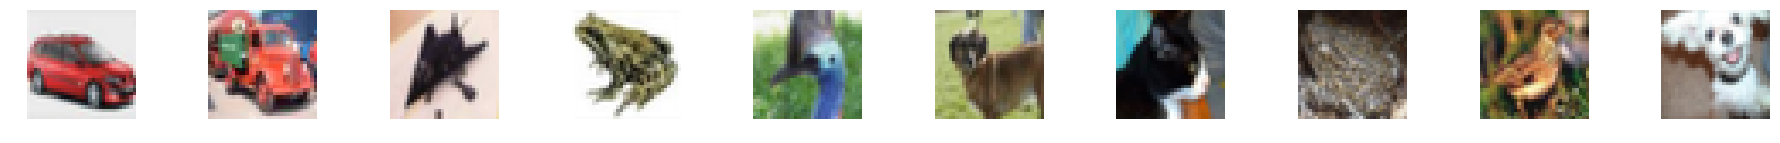

In [5]:
helper.show_images_simple(images)

### Build the network

In [6]:
dense_layer = partial(tf.layers.dense, activation=tf.nn.elu, 
                      kernel_initializer=tf.contrib.layers.variance_scaling_initializer())

inputs_ = tf.placeholder(tf.float32, (None, 32, 32, 3))

encoder = tf.layers.conv2d(inputs_, 12, [5, 5], strides=(1, 1), padding="SAME")
encoder = tf.layers.max_pooling2d(encoder, pool_size=(2, 2), strides=(2, 2), padding="SAME")
encoder = tf.layers.conv2d(encoder, 48, [5, 5], strides=(1, 1), padding="SAME")
encoder = tf.layers.max_pooling2d(encoder, pool_size=(2, 2), strides=(2, 2), padding="SAME")
encoder = tf.layers.conv2d(encoder, 192, [5, 5], strides=(4, 4), padding="SAME")

flattened = tf.contrib.layers.flatten(encoder)

hidden = dense_layer(flattened, 512)
hidden = dense_layer(hidden, 512)
hidden_mean = dense_layer(hidden, 20, activation=None)
hidden_gamma = dense_layer(hidden, 20, activation=None)
noise = tf.random_normal(tf.shape(hidden_gamma), dtype=tf.float32)
hidden_output = hidden_mean + tf.exp(0.5 * hidden_gamma) * noise
hidden = dense_layer(hidden_output, 512)
hidden = dense_layer(hidden, 512)

logits = dense_layer(hidden, 32 * 32 * 3, activation=None)
outputs = tf.sigmoid(logits)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.contrib.layers.flatten(inputs_), logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy)
latent_loss = 0.5 * tf.reduce_sum(tf.exp(hidden_gamma) + tf.square(hidden_mean) - 1 - hidden_gamma)
loss = reconstruction_loss + latent_loss

training_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### Train the network

In [ ]:
sess = tf.Session()

In [ ]:
print('Training...')

sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for batch_i in range(1, N_BATCHES + 1):
        for features, _, _ in helper.load_preprocess_training_batch(batch_i, batch_size):
            sess.run(training_op, feed_dict={inputs_: features})
    loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss], 
                                                                  feed_dict={inputs_: features})
    print("Epoch: {}/{}...".format(e + 1, epochs), 
          "Training loss: {:.4f}".format(loss_val), 
          "Reconstruction loss: {:.4f}".format(reconstruction_loss_val), 
          "Latent loss: {:.4f}".format(latent_loss_val))
    if e % show_images_every_n_epochs == 0:
        outputs_val = outputs.eval(session=sess, feed_dict={hidden_output: np.random.normal(size=[10, 20])})
        helper.show_images_simple(outputs_val, False)

Training...
('Epoch: 1/1000...', 'Training loss: 1983541.7500', 'Reconstruction loss: 1951223.8750', 'Latent loss: 32317.8398')
('Epoch: 2/1000...', 'Training loss: 1916665.6250', 'Reconstruction loss: 1887485.0000', 'Latent loss: 29180.5938')
('Epoch: 3/1000...', 'Training loss: 1891871.2500', 'Reconstruction loss: 1861231.6250', 'Latent loss: 30639.6523')
('Epoch: 4/1000...', 'Training loss: 1879093.8750', 'Reconstruction loss: 1847115.3750', 'Latent loss: 31978.4941')
('Epoch: 5/1000...', 'Training loss: 1872050.8750', 'Reconstruction loss: 1838110.3750', 'Latent loss: 33940.4883')
('Epoch: 6/1000...', 'Training loss: 1865344.3750', 'Reconstruction loss: 1832216.5000', 'Latent loss: 33127.8906')
('Epoch: 7/1000...', 'Training loss: 1860903.6250', 'Reconstruction loss: 1827500.0000', 'Latent loss: 33403.6484')
('Epoch: 8/1000...', 'Training loss: 1856844.1250', 'Reconstruction loss: 1822825.2500', 'Latent loss: 34018.8828')
('Epoch: 9/1000...', 'Training loss: 1855171.7500', 'Reconst

('Epoch: 71/1000...', 'Training loss: 1827458.3750', 'Reconstruction loss: 1798443.6250', 'Latent loss: 29014.7520')
('Epoch: 72/1000...', 'Training loss: 1827480.5000', 'Reconstruction loss: 1798251.6250', 'Latent loss: 29228.8691')
('Epoch: 73/1000...', 'Training loss: 1830817.5000', 'Reconstruction loss: 1801982.5000', 'Latent loss: 28835.0000')
('Epoch: 74/1000...', 'Training loss: 1827674.1250', 'Reconstruction loss: 1798461.0000', 'Latent loss: 29213.1328')
('Epoch: 75/1000...', 'Training loss: 1827032.0000', 'Reconstruction loss: 1797859.7500', 'Latent loss: 29172.3086')
('Epoch: 76/1000...', 'Training loss: 1827301.8750', 'Reconstruction loss: 1798364.2500', 'Latent loss: 28937.6602')
('Epoch: 77/1000...', 'Training loss: 1828392.8750', 'Reconstruction loss: 1799375.2500', 'Latent loss: 29017.5820')
('Epoch: 78/1000...', 'Training loss: 1832568.2500', 'Reconstruction loss: 1802941.7500', 'Latent loss: 29626.4941')
('Epoch: 79/1000...', 'Training loss: 1826933.2500', 'Reconstruc

('Epoch: 141/1000...', 'Training loss: 1822715.3750', 'Reconstruction loss: 1793460.7500', 'Latent loss: 29254.6758')
('Epoch: 142/1000...', 'Training loss: 1824314.8750', 'Reconstruction loss: 1795052.1250', 'Latent loss: 29262.7598')
('Epoch: 143/1000...', 'Training loss: 1822696.6250', 'Reconstruction loss: 1793381.7500', 'Latent loss: 29314.9336')
('Epoch: 144/1000...', 'Training loss: 1822914.6250', 'Reconstruction loss: 1793142.1250', 'Latent loss: 29772.4453')
('Epoch: 145/1000...', 'Training loss: 1822800.0000', 'Reconstruction loss: 1793570.0000', 'Latent loss: 29229.9648')
('Epoch: 146/1000...', 'Training loss: 1822635.5000', 'Reconstruction loss: 1793039.7500', 'Latent loss: 29595.7500')
('Epoch: 147/1000...', 'Training loss: 1822791.1250', 'Reconstruction loss: 1793330.8750', 'Latent loss: 29460.2695')
('Epoch: 148/1000...', 'Training loss: 1822540.8750', 'Reconstruction loss: 1793206.2500', 'Latent loss: 29334.6660')
('Epoch: 149/1000...', 'Training loss: 1822658.5000', 'R

('Epoch: 211/1000...', 'Training loss: 1820256.3750', 'Reconstruction loss: 1790612.5000', 'Latent loss: 29643.9004')
('Epoch: 212/1000...', 'Training loss: 1820124.0000', 'Reconstruction loss: 1790244.5000', 'Latent loss: 29879.5039')
('Epoch: 213/1000...', 'Training loss: 1820113.3750', 'Reconstruction loss: 1790373.6250', 'Latent loss: 29739.6953')
('Epoch: 214/1000...', 'Training loss: 1820187.3750', 'Reconstruction loss: 1790383.0000', 'Latent loss: 29804.3340')
('Epoch: 215/1000...', 'Training loss: 1820412.6250', 'Reconstruction loss: 1790614.3750', 'Latent loss: 29798.3066')
('Epoch: 216/1000...', 'Training loss: 1822103.3750', 'Reconstruction loss: 1792478.2500', 'Latent loss: 29625.0938')
('Epoch: 217/1000...', 'Training loss: 1822112.7500', 'Reconstruction loss: 1792776.3750', 'Latent loss: 29336.3633')
('Epoch: 218/1000...', 'Training loss: 1820115.0000', 'Reconstruction loss: 1790439.2500', 'Latent loss: 29675.7793')
('Epoch: 219/1000...', 'Training loss: 1820263.8750', 'R

('Epoch: 281/1000...', 'Training loss: 1818656.6250', 'Reconstruction loss: 1788518.7500', 'Latent loss: 30137.8281')
('Epoch: 282/1000...', 'Training loss: 1818808.2500', 'Reconstruction loss: 1788775.6250', 'Latent loss: 30032.6816')
('Epoch: 283/1000...', 'Training loss: 1818706.0000', 'Reconstruction loss: 1788530.5000', 'Latent loss: 30175.4688')
('Epoch: 284/1000...', 'Training loss: 1818974.5000', 'Reconstruction loss: 1788437.0000', 'Latent loss: 30537.4453')
('Epoch: 285/1000...', 'Training loss: 1818409.1250', 'Reconstruction loss: 1788289.7500', 'Latent loss: 30119.3516')
('Epoch: 286/1000...', 'Training loss: 1818187.7500', 'Reconstruction loss: 1787982.0000', 'Latent loss: 30205.7812')
('Epoch: 287/1000...', 'Training loss: 1818763.7500', 'Reconstruction loss: 1788373.0000', 'Latent loss: 30390.7383')
('Epoch: 288/1000...', 'Training loss: 1818677.5000', 'Reconstruction loss: 1788474.3750', 'Latent loss: 30203.0840')
('Epoch: 289/1000...', 'Training loss: 1818477.1250', 'R

('Epoch: 351/1000...', 'Training loss: 1817209.0000', 'Reconstruction loss: 1786830.0000', 'Latent loss: 30378.9707')
('Epoch: 352/1000...', 'Training loss: 1817055.2500', 'Reconstruction loss: 1786353.7500', 'Latent loss: 30701.5234')
('Epoch: 353/1000...', 'Training loss: 1817306.0000', 'Reconstruction loss: 1786895.2500', 'Latent loss: 30410.7441')
('Epoch: 354/1000...', 'Training loss: 1817137.6250', 'Reconstruction loss: 1786631.7500', 'Latent loss: 30505.8594')
('Epoch: 355/1000...', 'Training loss: 1817015.6250', 'Reconstruction loss: 1786336.5000', 'Latent loss: 30679.1211')
('Epoch: 356/1000...', 'Training loss: 1817156.2500', 'Reconstruction loss: 1786583.7500', 'Latent loss: 30572.4473')
('Epoch: 357/1000...', 'Training loss: 1816912.0000', 'Reconstruction loss: 1786287.3750', 'Latent loss: 30624.6719')
('Epoch: 358/1000...', 'Training loss: 1816998.5000', 'Reconstruction loss: 1786638.5000', 'Latent loss: 30359.9434')
('Epoch: 359/1000...', 'Training loss: 1816851.1250', 'R

('Epoch: 421/1000...', 'Training loss: 1815941.2500', 'Reconstruction loss: 1785473.1250', 'Latent loss: 30468.1777')
('Epoch: 422/1000...', 'Training loss: 1815999.0000', 'Reconstruction loss: 1785263.0000', 'Latent loss: 30735.9570')
('Epoch: 423/1000...', 'Training loss: 1815966.0000', 'Reconstruction loss: 1785529.2500', 'Latent loss: 30436.7500')
('Epoch: 424/1000...', 'Training loss: 1815555.3750', 'Reconstruction loss: 1785064.7500', 'Latent loss: 30490.6074')
('Epoch: 425/1000...', 'Training loss: 1815415.3750', 'Reconstruction loss: 1784768.3750', 'Latent loss: 30646.9434')
('Epoch: 426/1000...', 'Training loss: 1815480.7500', 'Reconstruction loss: 1784739.0000', 'Latent loss: 30741.7715')
('Epoch: 427/1000...', 'Training loss: 1815538.7500', 'Reconstruction loss: 1784785.6250', 'Latent loss: 30753.1582')
('Epoch: 428/1000...', 'Training loss: 1815751.5000', 'Reconstruction loss: 1785228.6250', 'Latent loss: 30522.9004')
('Epoch: 429/1000...', 'Training loss: 1815427.2500', 'R

('Epoch: 491/1000...', 'Training loss: 1815924.2500', 'Reconstruction loss: 1784698.0000', 'Latent loss: 31226.2754')
('Epoch: 492/1000...', 'Training loss: 1815950.2500', 'Reconstruction loss: 1784819.2500', 'Latent loss: 31131.0566')
('Epoch: 493/1000...', 'Training loss: 1816126.2500', 'Reconstruction loss: 1785346.6250', 'Latent loss: 30779.6875')
('Epoch: 494/1000...', 'Training loss: 1815843.2500', 'Reconstruction loss: 1784537.5000', 'Latent loss: 31305.7930')
('Epoch: 495/1000...', 'Training loss: 1816265.8750', 'Reconstruction loss: 1785123.1250', 'Latent loss: 31142.7324')
('Epoch: 496/1000...', 'Training loss: 1816067.2500', 'Reconstruction loss: 1784670.5000', 'Latent loss: 31396.7480')
('Epoch: 497/1000...', 'Training loss: 1816220.8750', 'Reconstruction loss: 1784730.6250', 'Latent loss: 31490.3008')
('Epoch: 498/1000...', 'Training loss: 1815731.6250', 'Reconstruction loss: 1784520.7500', 'Latent loss: 31210.8887')
('Epoch: 499/1000...', 'Training loss: 1815787.1250', 'R

('Epoch: 561/1000...', 'Training loss: 1814070.5000', 'Reconstruction loss: 1782937.6250', 'Latent loss: 31132.9355')
('Epoch: 562/1000...', 'Training loss: 1814438.0000', 'Reconstruction loss: 1783407.0000', 'Latent loss: 31030.9609')
('Epoch: 563/1000...', 'Training loss: 1814058.8750', 'Reconstruction loss: 1783277.0000', 'Latent loss: 30781.8770')
('Epoch: 564/1000...', 'Training loss: 1814143.2500', 'Reconstruction loss: 1783011.2500', 'Latent loss: 31132.0039')
('Epoch: 565/1000...', 'Training loss: 1814247.2500', 'Reconstruction loss: 1783390.0000', 'Latent loss: 30857.2109')
('Epoch: 566/1000...', 'Training loss: 1814203.8750', 'Reconstruction loss: 1783050.1250', 'Latent loss: 31153.7324')
('Epoch: 567/1000...', 'Training loss: 1814319.7500', 'Reconstruction loss: 1783429.1250', 'Latent loss: 30890.6211')
('Epoch: 568/1000...', 'Training loss: 1814235.0000', 'Reconstruction loss: 1782982.6250', 'Latent loss: 31252.3672')
('Epoch: 569/1000...', 'Training loss: 1814066.1250', 'R

('Epoch: 631/1000...', 'Training loss: 1813289.1250', 'Reconstruction loss: 1781685.3750', 'Latent loss: 31603.7754')
('Epoch: 632/1000...', 'Training loss: 1813202.6250', 'Reconstruction loss: 1781648.1250', 'Latent loss: 31554.4453')
('Epoch: 633/1000...', 'Training loss: 1813342.7500', 'Reconstruction loss: 1782099.1250', 'Latent loss: 31243.6445')
('Epoch: 634/1000...', 'Training loss: 1812999.0000', 'Reconstruction loss: 1781622.7500', 'Latent loss: 31376.3105')
('Epoch: 635/1000...', 'Training loss: 1813393.6250', 'Reconstruction loss: 1781909.1250', 'Latent loss: 31484.5137')
('Epoch: 636/1000...', 'Training loss: 1813062.8750', 'Reconstruction loss: 1781490.6250', 'Latent loss: 31572.2031')
('Epoch: 637/1000...', 'Training loss: 1813215.6250', 'Reconstruction loss: 1781900.6250', 'Latent loss: 31314.9414')
('Epoch: 638/1000...', 'Training loss: 1813250.8750', 'Reconstruction loss: 1781676.6250', 'Latent loss: 31574.2852')
('Epoch: 639/1000...', 'Training loss: 1813310.3750', 'R

('Epoch: 701/1000...', 'Training loss: 1813927.0000', 'Reconstruction loss: 1781808.8750', 'Latent loss: 32118.0957')


### Test the network

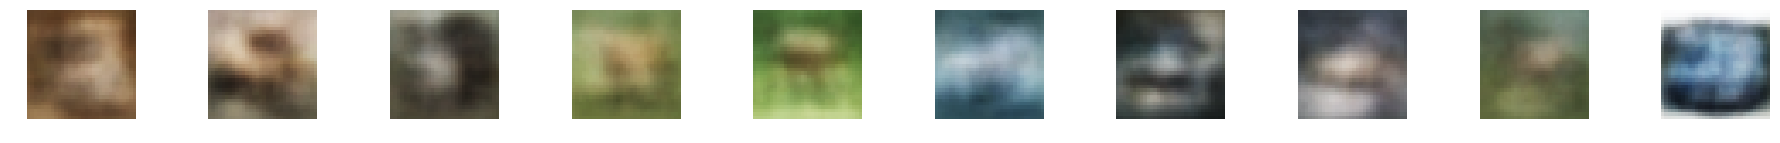

In [9]:
outputs_val = outputs.eval(session=sess, feed_dict={hidden_output: np.random.normal(size=[10, 20])})
helper.show_images_simple(outputs_val, False)